# Python Brno - Part 2B - Pandas

Notes:
- Next level Pandas
  - https://github.com/TomAugspurger/modern-pandas

### Pandas

- Provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.


- `pandas.DataFrame`
  - 2D size-mutable data structure with labeled row index and labeled column index.
- `pandas.Series`
  - 1D size-mutable data structure with labeled row index and labeled column.


- Fantastic documentation: http://pandas.pydata.org/pandas-docs/stable/

### The Titanic Survival Problem

Predict whether a passenger on the titanic will survive. 
- Input: information about each passenger
- Output: whether or not the passenger survived

The data we will use is located in the file `titanic_data.csv` and is similar to the set from https://www.kaggle.com/c/titanic/data





### Exploring the Titanic Data

Load the pandas library with alias `pd`

In [1]:
import pandas as pd
pd.options.display.max_rows = 8

Load matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Read the data csv file into a pandas DataFrame

In [3]:
df = pd.read_csv('titanic_data.csv')

### Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### The components of a DataFrame

In [5]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### More on groupby / stack / unstack

It's possible to groupby multiple variables.

What's the difference in the fare between 1st class and 3rd class for females and males?

In [8]:
df.groupby(['Sex','Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

Here we want the difference between the first row and third row and the difference between the fourth row and sixth row. It's ugly to write code specifically targeting these rows. Instead we can transform the data.

### Use `unstack` to pivot index labels into column labels

In [9]:
df.groupby(['Sex','Pclass'])['Fare'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


### Use `stack` to pivot column labels into index labels

In [10]:
df.groupby(['Sex','Pclass'])['Fare'].mean().unstack().stack()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
dtype: float64

Now we just need to subtract the two columns to get our answer

In [11]:
avg_fare_groupedby_sex_v_class = df.groupby(['Sex','Pclass'])['Fare'].mean().unstack()
avg_fare_groupedby_sex_v_class

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [12]:
abs(avg_fare_groupedby_sex_v_class.loc[:,3] - avg_fare_groupedby_sex_v_class.loc[:,1])

Sex
female    90.006988
male      54.564494
dtype: float64

### Exercise

What was the average age of females and males who survived?

In [14]:
df[df.Survived == 1].groupby(['Sex'])['Age'].mean()

Sex
female    28.847716
male      27.276022
Name: Age, dtype: float64

In [15]:
df.groupby(['Sex', 'Survived'])['Age'].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

### Setting

Suppose we want to store this calculation in a new column.

In [16]:
avg_fare_groupedby_sex_v_class.loc[:,'abs_diff_1_3'] = abs(avg_fare_groupedby_sex_v_class.loc[:,3] - avg_fare_groupedby_sex_v_class.loc[:,1])
avg_fare_groupedby_sex_v_class

Pclass,1,2,3,abs_diff_1_3
Sex,,,,
female,106.125798,21.970121,16.118810,90.006988
male,67.226127,19.741782,12.661633,54.564494


Question: Does this change our original dataframe?

### Sorting

In [17]:
df.sort_index(axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S


In [18]:
df.sort_values(by='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
...,...,...,...,...,...,...,...,...,...,...,...,...
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Missing Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


To clear out any rows with missing data call `dropna`

In [21]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Unfortunately this removes 80% of the observations in our dataset.

In [22]:
len(df.dropna()) / len(df)

0.2053872053872054

Instead we choose reasonable filler values for missing data based on inference or statistics.

Suppose we knew for example that any unspecified Cabin data meant that the passengers were staying in the Dorm room.

In [23]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
       ... 
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, dtype: object

In [24]:
df.Cabin.fillna(value='Dorm')

0      Dorm
1       C85
2      Dorm
3      C123
       ... 
887     B42
888    Dorm
889    C148
890    Dorm
Name: Cabin, dtype: object

### Exercise

Two rows are missing data in the Port (Embarked) column. Talk with your neighbors about which port would be most appropriate to replace the missing data and then execute the appropriate command.

1. Feed `df.Embarked.isnull()` into `df[  ]` as a filter see what the missing data rows are
2. Use `value_counts` to determine which values are the most common

In [27]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
df.Embarked.fillna(value='S')

0      S
1      C
2      S
3      S
      ..
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

In [29]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Manipulating data

- `apply` - execute function on a row / column of a DataFrame
  - row based: df.apply(fn, axis=0)   # default
  - row based: df.apply(fn, axis=1)
- `applymap` - execute function elementwise on a DataFrame
- `map` - execute function elementwise on a Series

In [31]:
import numpy as np

In [32]:
df_age_fare = df[['Age','Fare']]
df_age_fare.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Suppose we want to normalize some data between the values of 0 and 1. We can use a lambda function and `apply`

In [33]:
df_age_fare = df[['Age','Fare']]
df_norm_1 = df_age_fare.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df_norm_1.describe()

,Age,Fare
count,714.000000,891.000000
mean,0.367921,0.062858
std,0.182540,0.096995
min,0.000000,0.000000
25%,0.247612,0.015440
50%,0.346569,0.028213
75%,0.472229,0.060508
max,1.000000,1.000000


We can declare a separate function and pass it to `apply`

In [34]:
df_age_fare = df[['Age','Fare']]

def my_norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

df_norm_2 = df_age_fare.apply(my_norm)
df_norm_2.describe()

,Age,Fare
count,714.000000,891.000000
mean,0.367921,0.062858
std,0.182540,0.096995
min,0.000000,0.000000
25%,0.247612,0.015440
50%,0.346569,0.028213
75%,0.472229,0.060508
max,1.000000,1.000000


Or we can use pandas built in functions to get the same result

In [35]:
df_norm_3 = (df_age_fare - df_age_fare.min()) / (df_age_fare.max() - df_age_fare.min())

In [36]:
df_norm_3.describe()

,Age,Fare
count,714.000000,891.000000
mean,0.367921,0.062858
std,0.182540,0.096995
min,0.000000,0.000000
25%,0.247612,0.015440
50%,0.346569,0.028213
75%,0.472229,0.060508
max,1.000000,1.000000


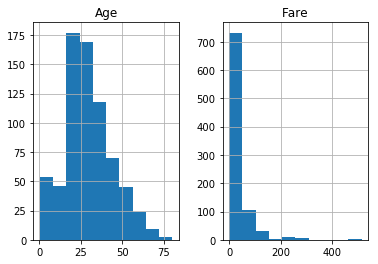

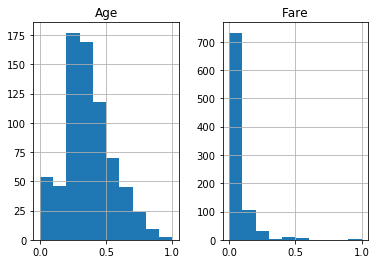

In [38]:
df_age_fare.hist();
df_norm_3.hist();

### Exercise

1. Determine how many rows are missing from the Age column
2. Plot the histogram of Age
3. It's common practice to fill in missing data with the mean of the variable.
4. Create a new column called age_filled_with_mean and set it's value to Age with missing items replaced by the mean
5. Plot the histogram of Age vs the histogram of age_filled_with_mean
6. Discuss with your neighbour whether this is a good or bad approach to filling in the missing data

In [43]:
df.Age.isnull().sum()

177

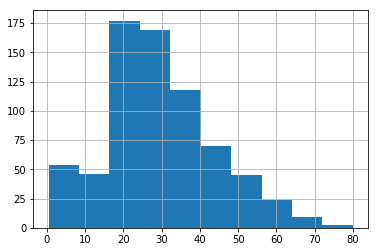

In [44]:
df.Age.hist()

In [45]:
df.Age.mean()

29.69911764705882

In [57]:
df['age_filled'] = df.Age.fillna(value=df.Age.mean())

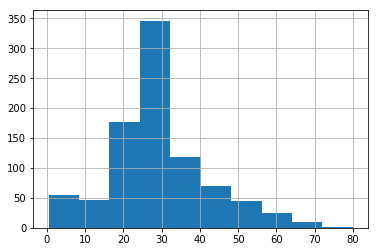

In [55]:
df.age_filled.hist()

### Time Series / rolling functions

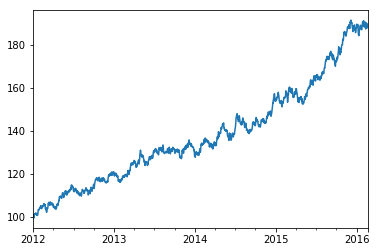

In [69]:
# http://stackoverflow.com/questions/16734621/random-walk-pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2016-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
y = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
y.plot()
# plt.show()

In [59]:
type(y.index)

pandas.tseries.index.DatetimeIndex

In [60]:
y

2012-01-01    100.773908
2012-01-02    100.732467
2012-01-03    101.025052
2012-01-04    100.599401
                 ...    
2016-02-19    185.825535
2016-02-20    186.838752
2016-02-21    187.579384
2016-02-22    188.518657
Freq: D, dtype: float64

Since we are using a DatetimeIndex we can slice it based on month and year

In [61]:
y.loc['2014-10']

2014-10-01    158.523084
2014-10-02    159.353680
2014-10-03    158.017839
2014-10-04    158.754365
                 ...    
2014-10-28    164.922753
2014-10-29    164.781372
2014-10-30    165.947502
2014-10-31    167.656998
Freq: D, dtype: float64

In [62]:
y.loc['2014']

2014-01-01    150.624611
2014-01-02    151.620331
2014-01-03    152.067912
2014-01-04    152.816256
                 ...    
2014-12-28    162.649169
2014-12-29    163.460193
2014-12-30    164.578283
2014-12-31    164.565268
Freq: D, dtype: float64

To calculate a moving average we use rolling

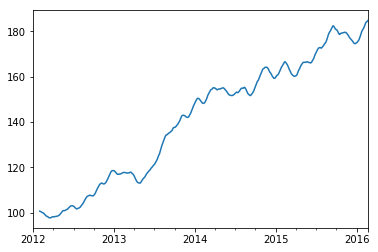

In [63]:
y.rolling(window=30).mean().plot()

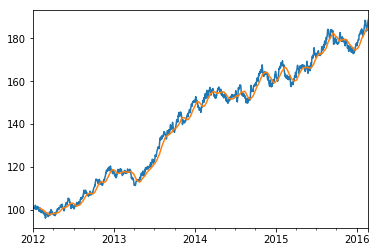

In [64]:
y.plot()
y.rolling(window=30).mean().plot()

### Exercise

Write a function which takes a DataFrame and a list of moving averages and returns the DataFrame with each of the moving averages calculated in a separate column

In [77]:
import pandas
moving_averages = [30, 60, 200]

def calculate_moving_averages(df, moving_average_list):
    for ma in moving_average_list:
        name = 'ma_{}'.format(ma)
        df[name] = df['bla'].rolling(window=ma, center=False).mean()
    return df

# Uncomment the next line
y_df = pandas.DataFrame(y, columns=['bla'])
#y_df
calculate_moving_averages(y_df, moving_averages)

,bla,ma_30,ma_60,ma_200
2012-01-01,100.491689,NaN,NaN,NaN
2012-01-02,100.862251,NaN,NaN,NaN
2012-01-03,100.523280,NaN,NaN,NaN
2012-01-04,99.478902,NaN,NaN,NaN
...,...,...,...,...
2016-02-19,188.282018,189.187041,188.385883,181.905905
2016-02-20,189.711029,189.243383,188.392841,182.018620
2016-02-21,188.759387,189.294490,188.402134,182.129326
2016-02-22,187.986397,189.312491,188.420401,182.231669


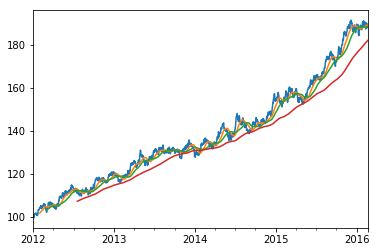

In [78]:
y_df.bla.plot()
y_df.ma_30.plot()
y_df.ma_60.plot()
y_df.ma_200.plot()